In [1]:
%reload_ext autoreload
%autoreload 2

from datasets import load_dataset

image_ls = load_dataset("TREC-AToMiC/AToMiC-Images-v0.2", split='train')
    
text_ls = load_dataset("TREC-AToMiC/AToMiC-Texts-v0.2", split='train')


/data6/wuyinjun/anaconda3/envs/test/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


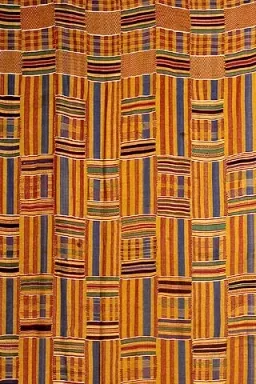

In [2]:
image_ls[0]['image']

In [6]:
image_ls[0]['image_id']

'86cd9811-1f16-3293-9a70-930bf4e53fa7'

In [4]:
print(len(image_ls))
print(len(text_ls))

11019202
10134744


In [5]:
qrels = load_dataset(
    'TREC-AToMiC/AToMiC-Qrels-v0.2',
    split='train',
    use_auth_token=True,
)

/data6/wuyinjun/anaconda3/envs/test/lib/python3.8/site-packages/datasets/load.py:2516: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(


In [9]:
from tqdm import tqdm
def construct_image_text_mappings(qrels):
    qrels_image_row_ids_mappings = dict()
    qrels_text_row_ids_mappings = dict()
    for idx in tqdm(range(len(qrels))):
        text_id = qrels[idx]['text_id']
        image_id = qrels[idx]['image_id']
        if text_id not in qrels_text_row_ids_mappings:
            qrels_text_row_ids_mappings[text_id] = []
        if image_id not in qrels_image_row_ids_mappings:
            qrels_image_row_ids_mappings[image_id] = []
        
        qrels_text_row_ids_mappings[text_id].append(idx)
        qrels_image_row_ids_mappings[image_id].append(idx)
                
    return qrels_image_row_ids_mappings, qrels_text_row_ids_mappings

qrels_image_row_ids_mappings, qrels_text_row_ids_mappings = construct_image_text_mappings(qrels)

100%|██████████| 4401903/4401903 [07:36<00:00, 9633.05it/s] 


In [10]:
# qrels_0_rel = [qrels[idx] for idx in range(len(qrels)) if qrels[idx]['image_id'] == image_ls[0]['image_id']]
qrels_image_row_ids_mappings[image_ls[0]['image_id']]

KeyError: '86cd9811-1f16-3293-9a70-930bf4e53fa7'

In [ ]:
qrels_image_row_ids_mappings

In [12]:
from tqdm import tqdm
def getRowIdx(id_list: list) -> dict:
    id2pos = {}
    for pos, _id in tqdm(enumerate(id_list), total=len(id_list)):
        id2pos[_id] = pos
    return id2pos


image_ids = image_ls.remove_columns(['image'])['image_id']
text_ids = text_ls['text_id']
image_id2row_dict = getRowIdx(image_ids)
text_id2row_dict = getRowIdx(text_ids)

100%|██████████| 10134744/10134744 [00:05<00:00, 1972118.57it/s]


In [ ]:
image_id2row_dict

In [14]:
image_id_in_common = set(image_id2row_dict.keys()).intersection(set(qrels_image_row_ids_mappings.keys()))

In [46]:
first_image_id = list(image_id_in_common)[10]    
print(first_image_id, len(image_id_in_common))

e6d51df6-ea34-31e8-881a-23eee3d9ab0a 3386183


In [47]:
first_image_row_id = image_id2row_dict[first_image_id]
print(first_image_row_id)

2324253


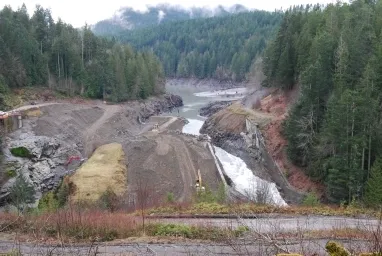

In [48]:
image_ls[first_image_row_id]['image']

In [49]:
print(first_image_row_id, first_image_id)
print(qrels_image_row_ids_mappings[first_image_id])

2324253 e6d51df6-ea34-31e8-881a-23eee3d9ab0a
[3791185, 4361327]


In [50]:
text_ls[text_id2row_dict[qrels[qrels_image_row_ids_mappings[first_image_id][0]]['text_id']]]

{'text_id': 'projected-07049153-004',
 'page_url': 'https://en.wikipedia.org/wiki/Elwha%20Dam',
 'page_title': 'Elwha Dam',
 'section_title': 'Dam removal',
 'context_page_description': 'The Elwha Dam was a 108-ft (33 m) high dam located in the , in the state of , on the  approximately  upstream from the mouth of the river on the .\n\nThe Elwha River Ecosystem and Fisheries Restoration Act of 1992 authorized the  to acquire the Elwha Dam and  hydroelectric power projects for decommissioning and demolition for habitat restoration. Removal of the Elwha Dam began in September 2011 and was fully complete by March 2012, allowing the Elwha River to flow freely through the site.',
 'context_section_description': 'The Elwha River Ecosystem and Fisheries Restoration Act of 1992 created funding and government support for mitigation of the dams on the Elwha. While s were proposed as a possibility, they were ultimately ruled out for the reasons given in the previous section. The major problem rais

In [ ]:
image_ls[]